# Bike sharing assignment

### Problem statement:
The company BoomBikes wnats to understand the significant driver variables in predicting the demand for shared bikes and how well these variables describe the bike demands.

### Solution steps:
👉Data Understanding and exploration 
👉Data Visualisation
👉Data Preparation
👉Model building 
👉Evaluation

# Step 1: Data understanding and exploration:

In [1]:
# Importing required packages and libraries:

# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning Libraries
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data csv file
bike_data = pd.read_csv("day.csv")

In [3]:
#print first 5 rows to check the dataframe
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking the last 5 rows to check the dataframe
bike_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
#check the statistical numeric data 
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking the null and column information:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#confirming the rows and columns number
bike_data.shape

(730, 16)

In [8]:
#checking for duplicats in the data
bike_data_dup = bike_data.duplicated()
print('Number of duplicate rows = %d' % (bike_data_dup.sum()))
bike_data[bike_data_dup]

Number of duplicate rows = 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


##### Observations: 
    1. There are 730 rows: All are not-null i,e no missing value in the data and 16 columns.
    2. There are no duplicates present in the dataset.

#### Cleaning the data:
    There are a few cloumns which are unuseful for the analysis:
    1. instant: Its is just a row index (serial number)
    2. dteday: This colum is already seggregated further as month, yr (year 2018 as 0 and 2019 as 1), weekday so we
       actually don't need it for analysis.
    3. There are a few guest customers (casual column) and registered customers (registered column), if we sum them up we
        get the total count of customers (cnt column). Because we already have cnt with us dropping casual and registered 
        is okay.

In [9]:
bike_data.drop(["instant", "dteday","casual", "registered"], axis = 1, inplace = True)

In [10]:
#confirming/inspecting the dropped columns
bike_data.shape

(730, 12)

In [11]:
# mapping the non-binary categorical columns (season, mnth, weekday, weathersit) to their original values.

In [12]:
bike_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
bike_data["season"]=bike_data.season.map({1:"Spring", 2:"Summer", 3: "Fall", 4:"winter"})  #mapping season

In [14]:
bike_data["season"].head(2)

0    Spring
1    Spring
Name: season, dtype: object

In [15]:
# cross verifying weather mapping is done
bike_data["season"].value_counts()

Fall      188
Summer    184
Spring    180
winter    178
Name: season, dtype: int64

In [16]:
# mapping month
bike_data["mnth"]=bike_data.mnth.map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})

In [17]:
# cross verifying weather mapping is done
bike_data["mnth"].value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [18]:
#mapping weekday
bike_data["weekday"]=bike_data.weekday.map({0:"sun", 1:"mon", 2:"tue", 3:"wed", 4:"thu", 5:"fri", 6:"sat"})

In [19]:
# cross verifying weather mapping is done
bike_data["weekday"].value_counts()

mon    105
tue    105
wed    104
thu    104
fri    104
sat    104
sun    104
Name: weekday, dtype: int64

In [20]:
# mapping weathersit
bike_data["weathersit"]=bike_data.weathersit.map({1:"Clear",2:"Misty",3:"Light_rainstorm",4:"Heavy_thunder"})

In [21]:
# cross verifying weather mapping is done
bike_data["weathersit"].value_counts()

Clear              463
Misty              246
Light_rainstorm     21
Name: weathersit, dtype: int64

In [22]:
# Converting columns to categorical because eventually we'll be needing dummies for them. 
bike_data["season"]= bike_data.season.astype("category")
bike_data["yr"]= bike_data.yr.astype("category")
bike_data["mnth"]= bike_data.mnth.astype("category")
bike_data["holiday"]= bike_data.holiday.astype("category")
bike_data["weekday"]= bike_data.weekday.astype("category")
bike_data["workingday"]= bike_data.workingday.astype("category")
bike_data["weathersit"]= bike_data.weathersit.astype("category")

In [23]:
#checking the dataset after mapping
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
#rechecking info to confirm datatype conversion
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


# Step 2: Data visualization (EDA)

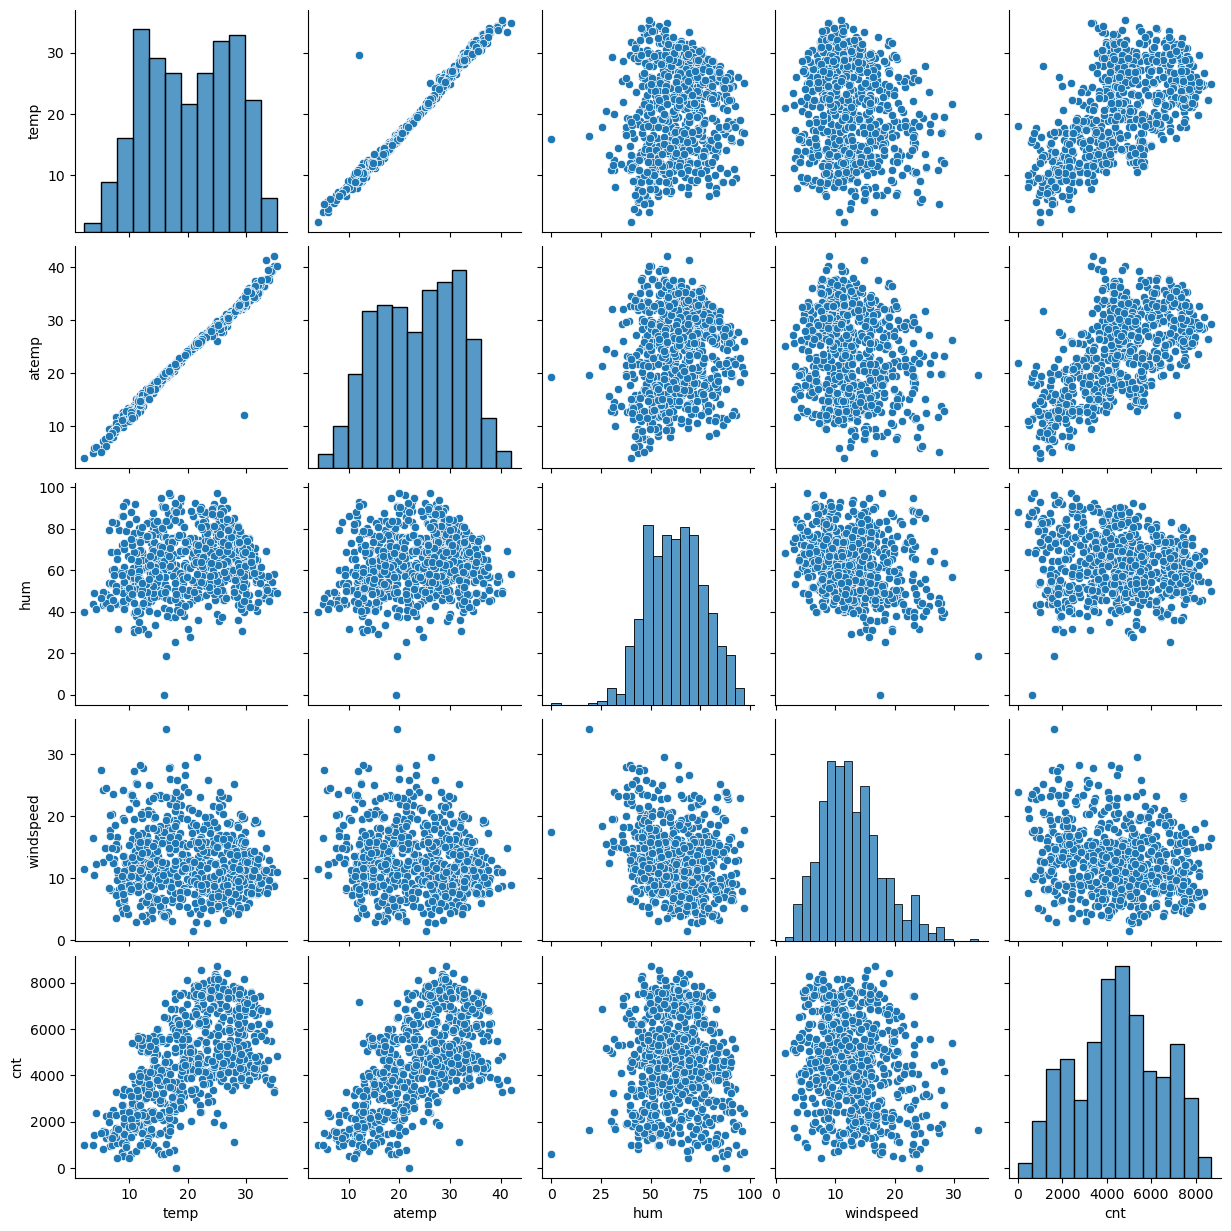

In [25]:
#checking the linear trend for the numeric variables
sns.pairplot(bike_data);

##### Inference:
1. The above graph shows the linear trend between temp and atemp
2. temp and atemp also show positive trend with target variable (cnt)

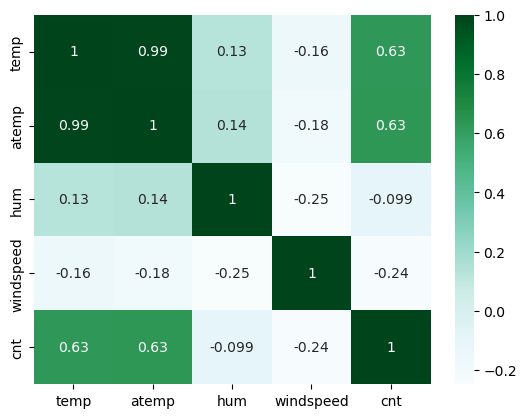

In [26]:
#checking the correlation:
sns.heatmap(bike_data.corr(), annot = True, cmap = 'BuGn');

##### Inference:
The heatmap also confirms that there is linear relationship between temp and atemp. Being highly correlated we cannot use both parameters due to multicollinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables.

In [27]:
#separating the categorical and continous data for further visualization: 
cat_cols=['season','mnth','weekday','weathersit', 'holiday', 'workingday','yr']
cont_cols=['temp','atemp','hum','windspeed']
target=["cnt"]
len(cat_cols)+len(cont_cols)+len(target) #to check if all the columns are covered up

12

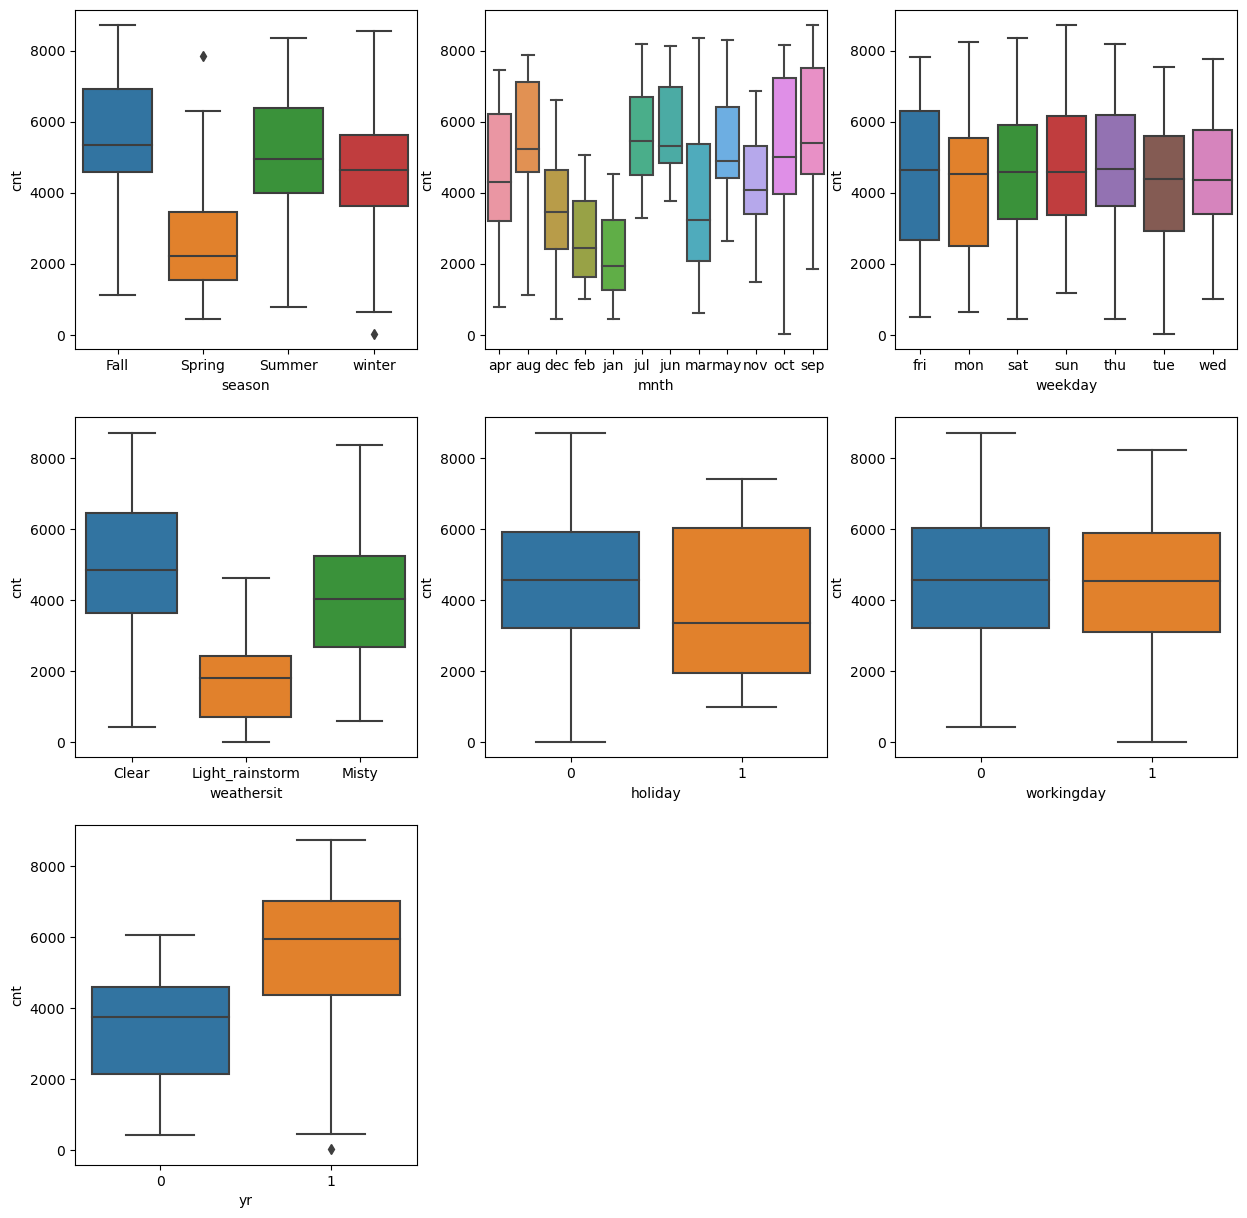

In [28]:
#Boxplot for categorical columns against target variable (cnt)
plt.figure(figsize=(15, 15))
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_data, x=i[1], y="cnt")
plt.show();

In [29]:
# Plotting the bar plot for categorical columns to get more clear inference
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x= column, y = 'cnt', data =bike_data )
    plt.subplot(1,2,2)
    sns.barplot(x= column,y = 'cnt',data = bike_data, hue ='yr',palette='Set1')
    plt.legend(loc = "best")
    plt.show();

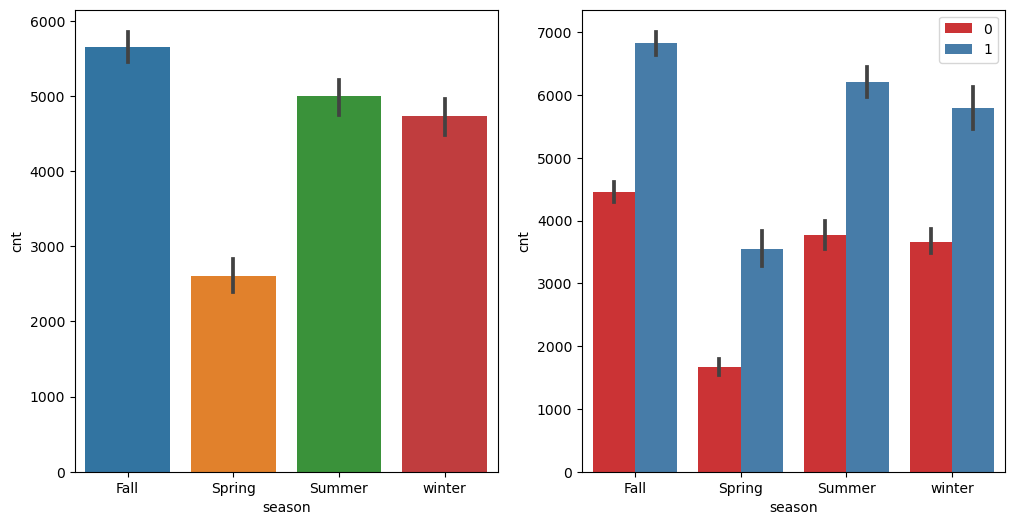

In [30]:
plot_cat_columns("season")

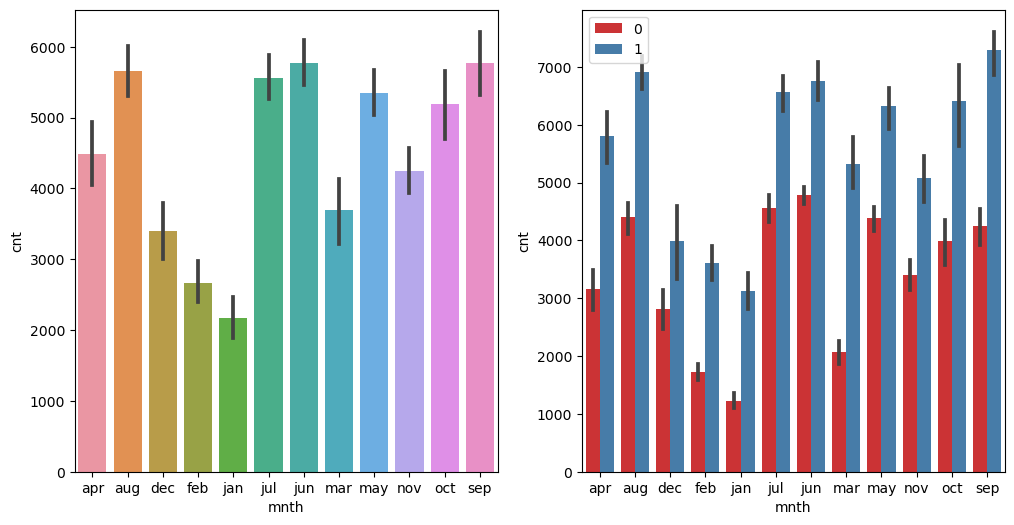

In [31]:
plot_cat_columns("mnth")

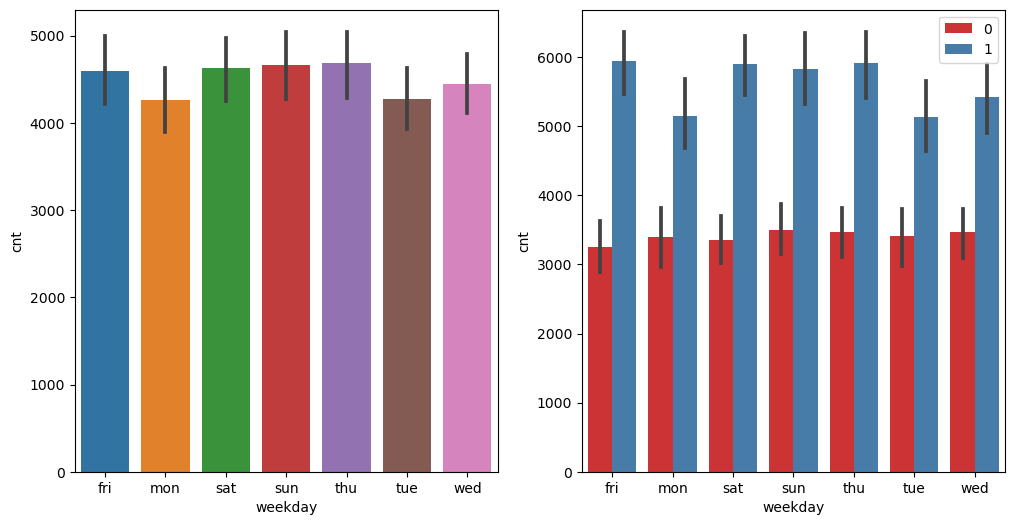

In [32]:
plot_cat_columns("weekday")

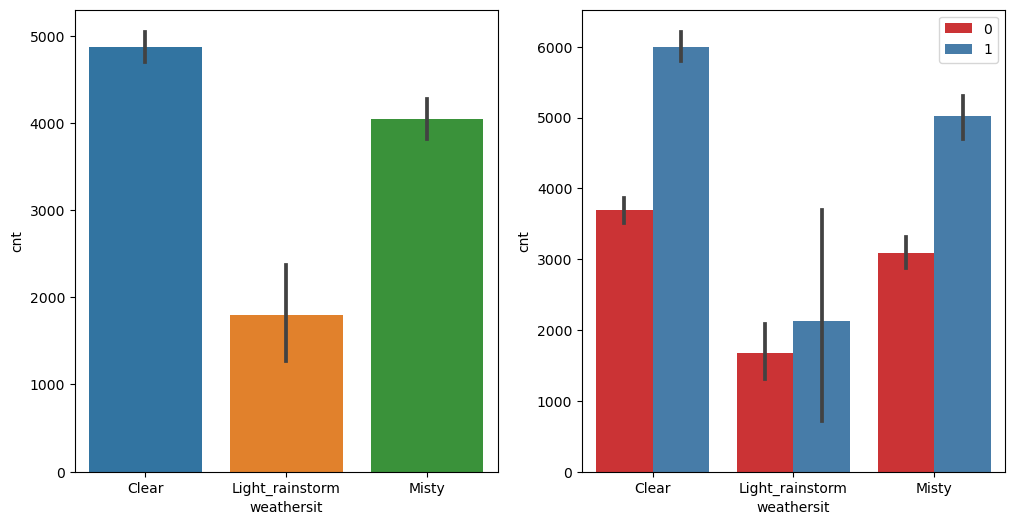

In [33]:
plot_cat_columns("weathersit")

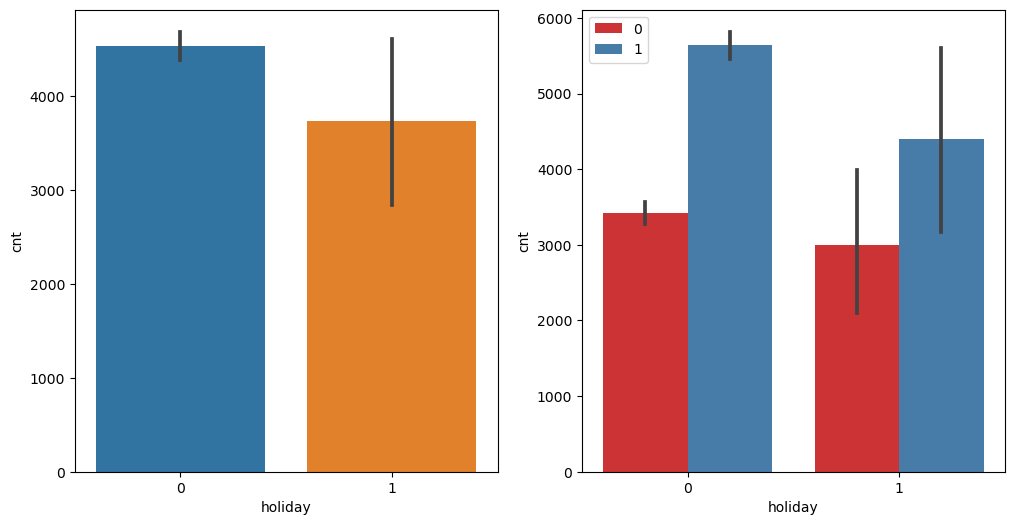

In [34]:
plot_cat_columns("holiday")

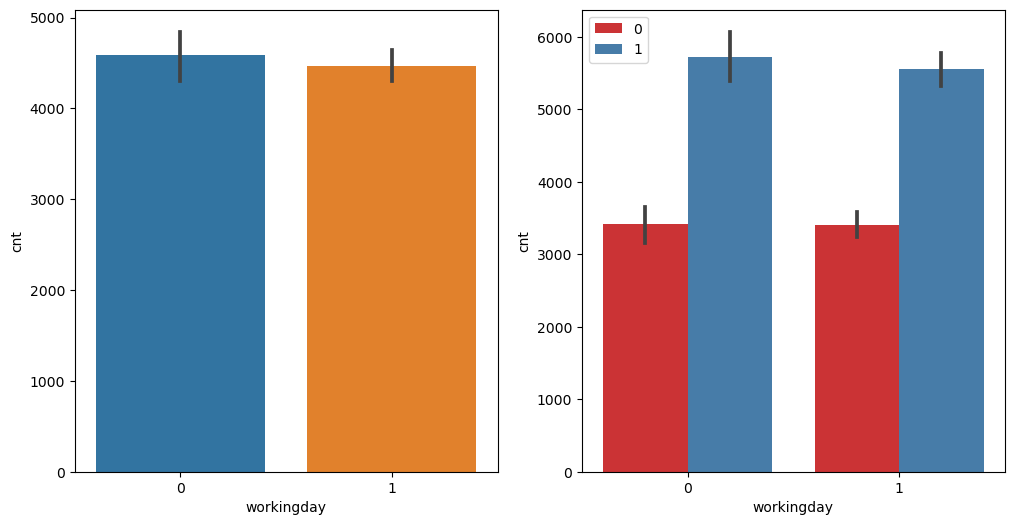

In [35]:
plot_cat_columns("workingday")

##### Inference:
1. The demand for bikes has increased in the year 2019 as compaired to 2018.
2. Spring season has lowest whereas Fall has highest bike demand.
3. From the mid year i,e in the months of may, jun, jul, aug, sep and oct most the bookings were done.The bookings increase from start ot the year till september then gradually decreases. September month has higest number of bookings. There is overall incerease in bookings yearwise. 
4. Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.
5. During clear weather the bookings are most which seems fair enough and across all the seasons the bookings have incereased in 2019 than in 2018.
6. holiday and workingday does not show much difference respectively so may be they are not so good indicaters. It can be confirmed with further check on other parameters.

# Step 3: Data preparation:

In [36]:
bike_data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349


In [37]:
# creating dummies fro the categorical columns of bike_data (season, mnth, weekday and weathersit)
season_bike = pd.get_dummies(bike_data.season, drop_first= True)
mnth_bike = pd.get_dummies(bike_data.mnth, drop_first= True)
weekday_bike = pd.get_dummies(bike_data.weekday, drop_first= True)
weathersit_bike = pd.get_dummies(bike_data.weathersit, drop_first= True)

In [38]:
# Merging  the dataframe, with the dummy variable dataset. 
bike_new = pd.concat([bike_data, season_bike, mnth_bike, weekday_bike, weathersit_bike],axis=1)

In [39]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_rainstorm,Misty
0,Spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# dropping the columns for which we lready have created dummies
bike_new.drop(["season","mnth","weekday","weathersit"], axis =1, inplace = True)

In [41]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_rainstorm,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#Rechecking the new data for missing values:
bike_new.isnull().sum()

yr                 0
holiday            0
workingday         0
temp               0
atemp              0
hum                0
windspeed          0
cnt                0
Spring             0
Summer             0
winter             0
aug                0
dec                0
feb                0
jan                0
jul                0
jun                0
mar                0
may                0
nov                0
oct                0
sep                0
mon                0
sat                0
sun                0
thu                0
tue                0
wed                0
Light_rainstorm    0
Misty              0
dtype: int64

#### We do not have any null values so we can proceed further and split data into train and test data.

# Step 4:Model building 
#### steps:
1. Divide the data in to train and test
2. Scaling
3. Divide the data into X and Y
4. Perform linear regression
5. Use the mixed approach(RFE and manual) for feature selection and modelling

### 1. Divide data into train and test

In [43]:
#Splitting the Dataframe into Train and Test Sets
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [44]:
# check the shape of train dataset
bike_train.shape

(510, 30)

In [45]:
# check the shape of test dataset
bike_test.shape

(220, 30)

In [46]:
bike_data.shape # reconfirming if the split has taken properly

(730, 12)

In [47]:
# statistical values of train data
bike_train.describe()

,temp,atemp,hum,windspeed,cnt,Spring,Summer,winter,aug,dec,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_rainstorm,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,20.108257,23.500287,63.123710,12.834912,4485.337255,0.243137,0.247059,0.247059,0.096078,0.084314,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,7.431626,8.090963,14.153170,5.292031,1950.666077,0.429398,0.431725,0.431725,0.294988,0.278131,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# statistical values of test data
bike_test.describe()

,temp,atemp,hum,windspeed,cnt,Spring,Summer,winter,aug,dec,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_rainstorm,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,20.808400,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,0.236364,0.059091,0.086364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,7.672796,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,0.425817,0.236333,0.281541,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2. Scaling

In [49]:
# Scaling all the continous columns of train dataframe
scaler = MinMaxScaler()
num_var_train = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_var_train] = scaler.fit_transform(bike_train[num_var_train])

In [50]:
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_rainstorm,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
bike_train.describe() #statistical description to verify the scaling done

,temp,atemp,hum,windspeed,cnt,Spring,Summer,winter,aug,dec,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_rainstorm,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# Scaling all the continous columns of test dataframe
scaler = MinMaxScaler()
num_var_test = ['temp','atemp','hum','windspeed','cnt']
bike_test[num_var_test] = scaler.fit_transform(bike_test[num_var_test])

In [53]:
bike_test.describe()

,temp,atemp,hum,windspeed,cnt,Spring,Summer,winter,aug,dec,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_rainstorm,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,0.236364,0.059091,0.086364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,0.425817,0.236333,0.281541,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Dividing the data into X train and y train

In [54]:
# X train are the independent variables
X_train = bike_train
# Y train is the target variable
y_train = bike_train.pop("cnt")

In [55]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'Light_rainstorm', 'Misty'],
      dtype='object')

### 4.Perform linear regression

In [56]:
# Building a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#### 5.  Using the mixed approach(RFE and manual) for feature selection and modelling

In [57]:
# Running RFE with the output number of the variable equal to 15
rfe = RFE(estimator = lr, 
          n_features_to_select = 15,
          verbose=True)   # running RFE
rfe = rfe.fit(X_train, y_train)

Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


In [58]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True  True  True  True  True False  True
 False  True  True False False False  True False  True False False False
 False False False  True  True]
[ 1  1  4  1  3  1  1  1  1  1 10  1  2  1  1 12 15  9  1 13  1  8  5  6
 14  7 11  1  1]


In [59]:
# Printing columns selected by RFE along with their weights in order
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Support':rfe.support_,
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Support,Ranking
0,yr,True,1
20,sep,True,1
18,nov,True,1
27,Light_rainstorm,True,1
13,jan,True,1
11,dec,True,1
9,winter,True,1
8,Summer,True,1
14,jul,True,1
6,windspeed,True,1


In [60]:
# printing the variables selected by RFE:
columns_train = X_train.columns[rfe.support_]
print(columns_train)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'Light_rainstorm',
       'Misty'],
      dtype='object')


In [61]:
# printing the rejected columns
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [62]:
# Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [63]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[columns_train]

In [64]:
X_train_rfe.shape

(510, 15)

In [65]:
# Calculating the VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,Spring,4.37
7,winter,4.06
6,Summer,2.82
14,Misty,2.32
0,yr,2.09
11,nov,1.85
9,jan,1.75


# Model 1

In [66]:
# 1st linear regression model
X_train_lrm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lrm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          8.15e-189
Time:                        10:16:35   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036     

since it is always better to drop one parameter at a time from the statistics obtained above: humidity has higest VIF (also standard error), p value of dec and jan are too high so will drop first humidity then recheck VIF and p values.

In [67]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,Spring,2.89
5,Summer,2.24
0,yr,2.07
10,nov,1.81
8,jan,1.66
9,jul,1.59
13,Misty,1.57


There seems temperature (temp) only has high VIF (in general more than 5) so chances of miscollinearity is more with temp.
Lets see further if we need to drop it or not.

In [68]:
# Building 2nd linear regression model

X_train_lrm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lrm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          4.75e-186
Time:                        10:16:35   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2450      0.032     

In [69]:
# The p value of nov is high so it would be better to drop it
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,Spring,2.89
5,Summer,2.24
0,yr,2.07
6,winter,2.05
8,jan,1.65
9,jul,1.59
12,Misty,1.57
10,sep,1.34


The VIF has not changed much so continuing further modelling

In [70]:
# Building 3rd linear regression model

X_train_lrm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lrm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.74e-186
Time:                        10:16:35   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2283      0.031     

In [71]:
# The p value of dec is high so it would be better to drop it
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,Spring,2.75
5,Summer,2.24
0,yr,2.07
6,winter,1.78
7,jan,1.61
8,jul,1.59
11,Misty,1.56
9,sep,1.34


In [72]:
# Building 4th linear regression model

X_train_lrm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lrm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          8.14e-187
Time:                        10:16:35   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2154      0.030     

In [73]:
# The p value of jan is high so it would be better to drop it
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,Summer,2.23
4,Spring,2.08
0,yr,2.07
6,winter,1.78
7,jul,1.58
10,Misty,1.55
8,sep,1.34
9,Light_rainstorm,1.08


 The vif has changed but since VIF below 3 is generally considered good we can continue further modelling

In [74]:
# Building 5th linear regression model

X_train_lrm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lrm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          5.06e-187
Time:                        10:16:36   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030     

In [75]:
# The p value of july is high so it would be better to drop it
X_train_new = X_train_new.drop(['jul'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,Spring,1.99
5,Summer,1.90
6,winter,1.63
9,Misty,1.55
7,sep,1.23
8,Light_rainstorm,1.08
1,holiday,1.04


VIF has dropped down below 5 which is good.

In [76]:
# Building 6th linear regression model

X_train_lrm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lrm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.47e-186
Time:                        10:16:36   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030     

In [77]:
# The p value of spring is high so it would be better to drop it
X_train_new = X_train_new.drop(['Spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,Summer,1.57
8,Misty,1.48
5,winter,1.37
6,sep,1.20
7,Light_rainstorm,1.08
1,holiday,1.04


The above VIF is acceptable

In [78]:
# Building 7th linear regression model

X_train_lrm_7 = sm.add_constant(X_train_new)
lr_7 = sm.OLS(y_train,X_train_lrm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.83e-186
Time:                        10:16:36   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1259      0.017     

The above lr_7 model seems to be significant because it has minimum miscollinearity between the predictor variables.
The p value is almost 0, Probbability of F-statistic came out to be 2.83e-186 which is significantly low and F statisctics is 271.9

In [79]:
# Checking the parameters and their coefficient values
lr_7.params

const              0.125926
yr                 0.232861
holiday           -0.098685
temp               0.548008
windspeed         -0.153246
Summer             0.088080
winter             0.129345
sep                0.101195
Light_rainstorm   -0.282869
Misty             -0.078375
dtype: float64

The best fit equation based on lr_7 would be:

    cnt = 0.125926 + (yr*0.232861)-(holiday*0.098685) +(temp*0.548008)- (windspeed*0.153246)+(Summer*0.088080)+
           (winter*0.129345)+(sep*0.101195)-(Light_rainstorm*0.282869)-(Misty*0.078375)

# Step 5: Evaluation

### Residual Analysis of the train data and validation

In [80]:
X_train_lrm_7

,const,yr,holiday,temp,windspeed,Summer,winter,sep,Light_rainstorm,Misty
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,1
111,1.0,0,0,0.345824,0.380981,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,1,0,0,0,1


In [81]:
y_train_pred = lr_7.predict(X_train_lrm_7)

In [82]:
y_train_pred

576    0.764943
426    0.483717
728    0.391485
482    0.556437
111    0.266762
         ...   
578    0.803572
53     0.219894
350    0.246747
79     0.307973
520    0.642313
Length: 510, dtype: float64

Linear regression model can be validated by following assumptions: 
- Normality of Errors 
- Linear Relationship
- Absence of Multicollinearity
- Homoscedasticity
- Independance of residuals

### Normality of error terms

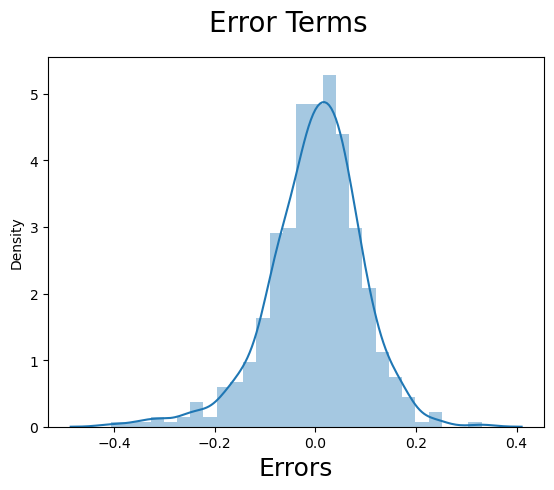

In [83]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18);

The errors follow normal distribution graph.

### Linear Relationship

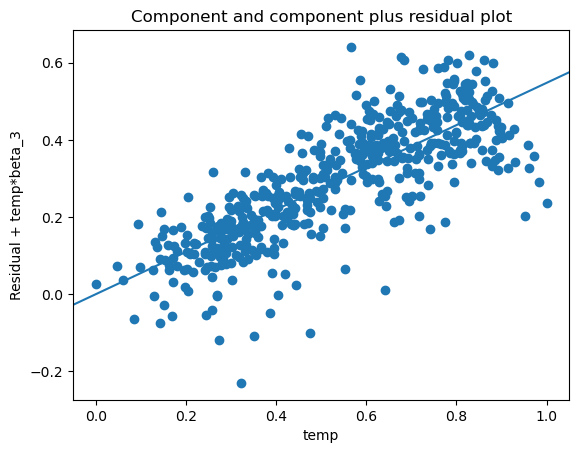

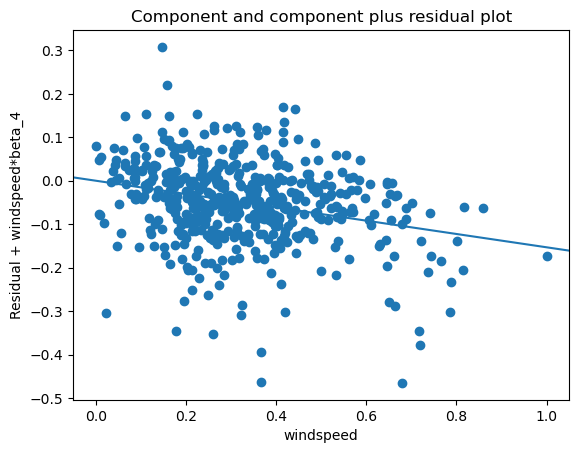

In [84]:
sm.graphics.plot_ccpr(lr_7, 'temp')
plt.show()


sm.graphics.plot_ccpr(lr_7, 'windspeed')
plt.show()

The linearity is maintained

### Absence of Multicollinearity

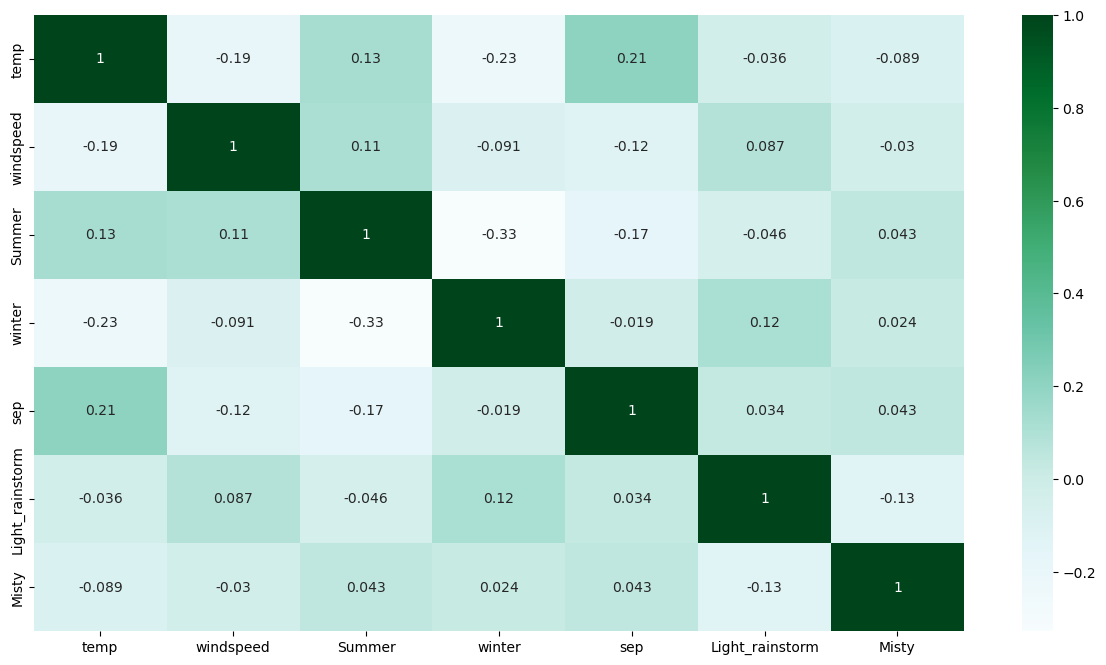

In [85]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="BuGn")
plt.show();

The above heatmap shows there is no  Multicollinearity as all the values are very low.

### Homoscedasticity

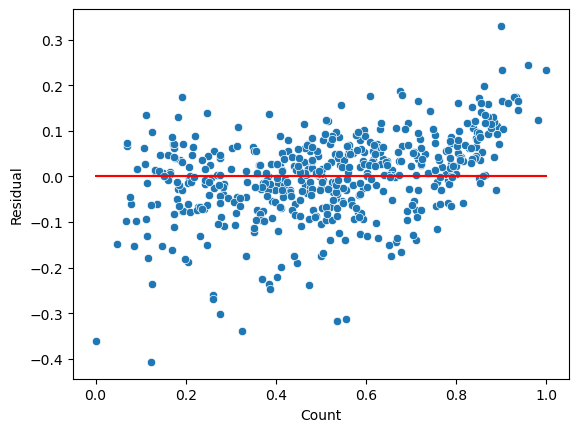

In [86]:
y_train_pred = lr_7.predict(X_train_lrm_7)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show();

There is no specific pattern in the spread of the residual errors. 

### Independance of residuals:
 2.097 durbin watson value indiactes that there is no first order auto correlation in the regression model lr_7. 
    This is desirable because it indicates that the assumptions of independence of observations are not violated.

# Making Predictions Using the Final Model

In [87]:
bike_test.describe()

,temp,atemp,hum,windspeed,cnt,Spring,Summer,winter,aug,dec,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_rainstorm,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,0.236364,0.059091,0.086364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,0.425817,0.236333,0.281541,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
# splitting into X and y
X_test = bike_test
y_test = bike_test.pop('cnt')

In [89]:
cols = X_train_new.columns

X_test = X_test[cols]

# Adding constant variable to test dataframe
X_test_lrm_7 = sm.add_constant(X_test)

In [90]:
#predicting
y_pred = lr_7.predict(X_test_lrm_7)

In [91]:
# r2 score
r2 = r2_score(y_test, y_pred)
round(r2,3)

0.785

In [92]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(round((adjusted_r2),3))

0.776


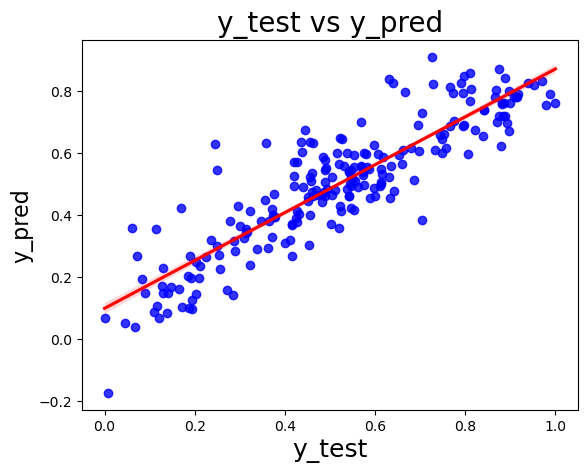

In [93]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

##  Comparision of train and test model:

    Train model-
            R-squared:        0.830
            Adj. R-squared:   0.827
    Test model-
            R-squared:        0.785
            Adj. R-squared:   0.776

#### Analysing the above model, the comapany should focus on the following features:
    . September month and Spring season both would be good for business expansion.
    . There is incerase in the demand yearwise.
    . There would be less bookings during Thunderstorm, Rain so this time period can be utilised for bike servicing and maintainence.

#### Significant driver variables to predict the demand for shared bikes are: 
    . Year
    . holiday
    . temp
    . windspeed
    . Season
    . months
    . weathersit
    . weekday